# Darknet

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import torch
from torch.utils.data.dataloader import DataLoader

import bdd.utils as bddut
from bdd.dataset import BDDDataset
import bdd.consts as bddk
import yolo.utils as yolout
import yolo.consts as yolok

In [3]:
layers = yolout.read_cfg(yolok.CFG_FILE)
darknet = yolout.parse_layers(layers)
darknet

### Darknet ###
    Batch size: 1
    Subdivisions: 1
    Max batches: 20000
    Width: 416
    Height: 256
    Channels: 3
    Learning rate: 0.001
    Burn in: 1000
    Steps: [(16000, 0.1), (18000, 0.1)]
    Momentum: 0.9
    Decay: 0.0005
    Angle: 0.0
    Saturation: 1.5
    Exposure: 1.5
    Hue: 0.1
(0): Convolution (
    Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    LeakyReLU(negative_slope=0.1)
)
(1): Convolution (
    Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    LeakyReLU(negative_slope=0.1)
)
(2): Convolution (
    Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
    BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    LeakyReLU(negative_slope=0.1)
)
(3): Convolution (
    Conv2d(32, 64, kernel_

In [4]:
darknet.load_weights(yolok.WEIGHTS_FILE)

True

In [5]:
val_ds = BDDDataset(bddk.VAL_LIST_FILE, bddk.VAL_IMG_PATH, bddk.VAL_LBL_PATH, bddk.IMG_EXT)
val_dl = DataLoader(val_ds, batch_size=1, shuffle=False, num_workers=1,
                    collate_fn=BDDDataset.collate_fn)
iterator = iter(val_dl)

car: 0.28
car: 0.69
car: 0.89
car: 0.65
tsign: 0.71
person: 0.62
car: 0.90


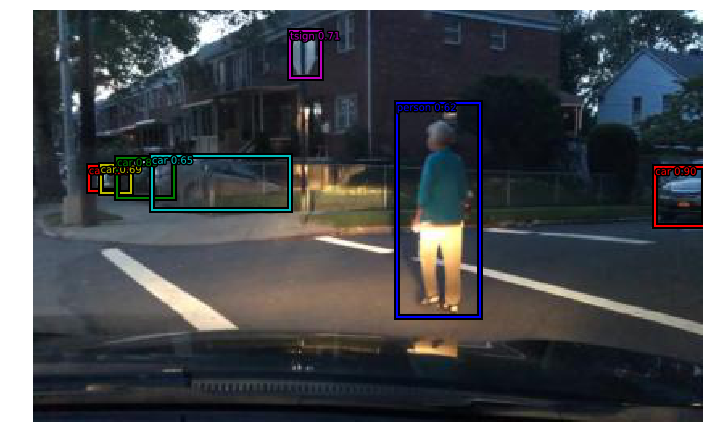

In [6]:
samples = next(iterator)
images = samples[0]
labels = samples[1]
bboxes = samples[2]

darknet.eval()
with torch.no_grad():
    predictions = darknet(images)
result = yolout.process_predictions(
    predictions, yolok.DETECTION_THRESH, yolok.NMS_THRESH)

r = result[0]
for i in range(r.size()[0]):
    cl = r[i, 4].int().item()
    score = r[i, 5].item()
    print(f'{bddk.CLASSES[cl]}: {score:.2f}')

img_size = bddk.IMG_REDUCED_SIZE
bddut.show_img(images[0, :, :, :], r[:, 4].int(),
               r[:, :4], img_size, probabilities=r[:, 5])